<a href="https://colab.research.google.com/github/ira89l/Home-tasks-/blob/main/Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/yulu_rental.csv')

In [225]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


**1.Я хочу проаналізувати вплив усіх погодних умов на кількість орендованих велосипедів.**

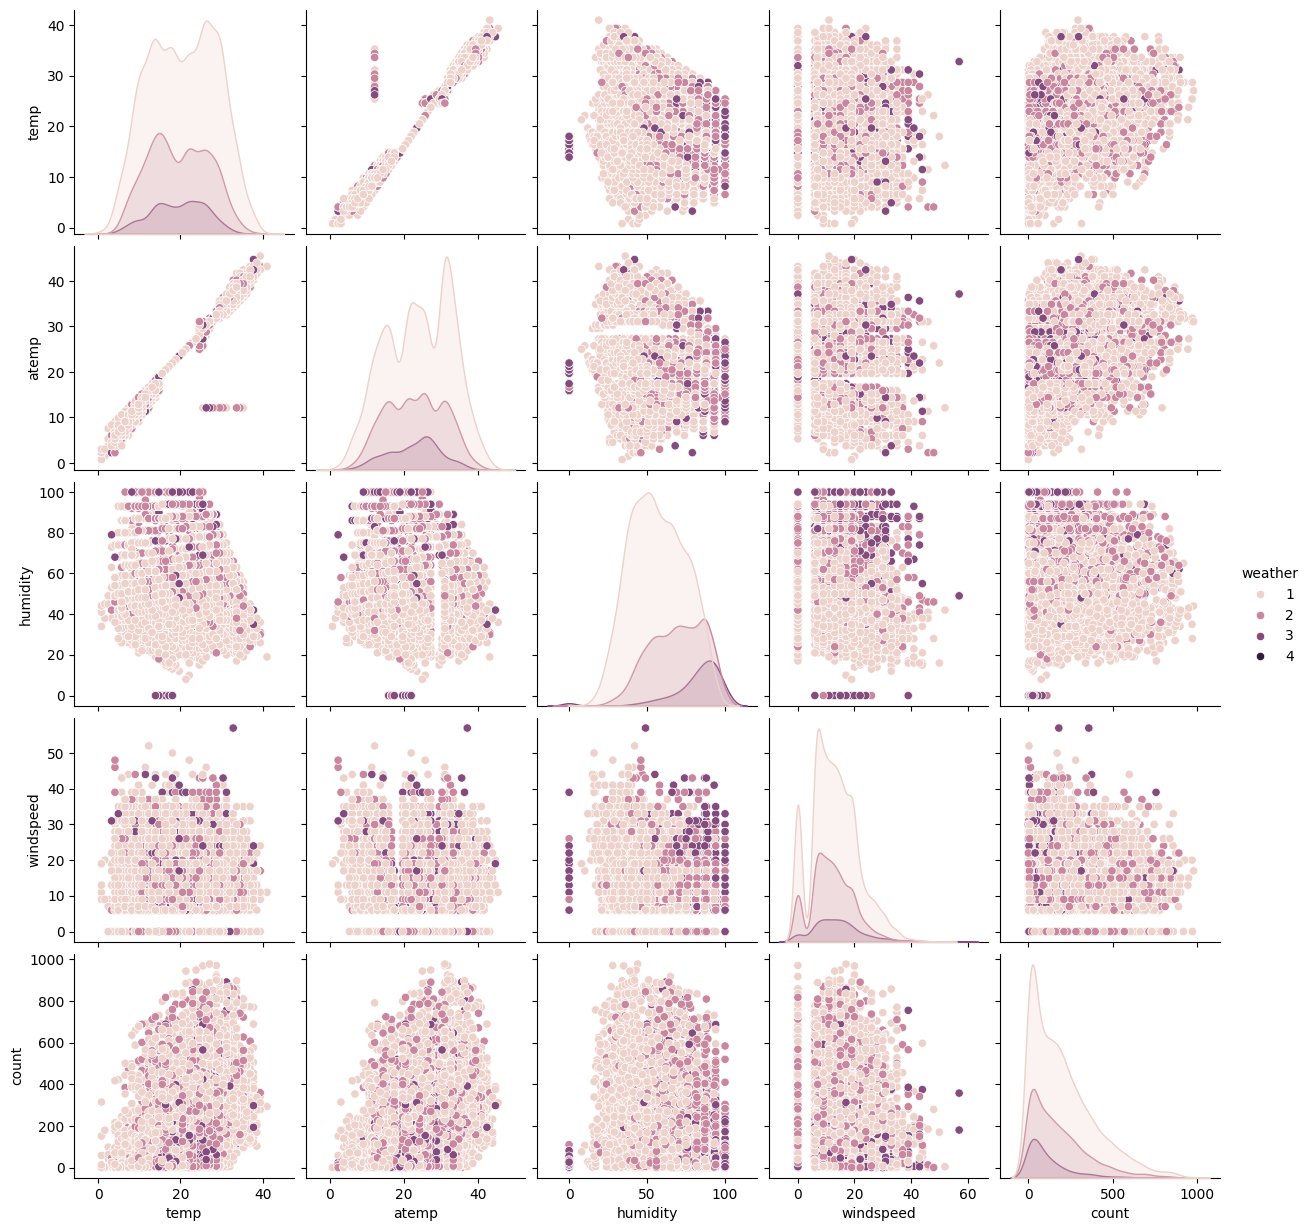

In [246]:
df_weather = df[['weather', 'temp', 'atemp', 'humidity', 'windspeed', 'count']]
sns.pairplot(data=df_weather, hue='weather');

Я бачу, що є позитивна кореляція лише між двома характеристиками: температурою та темперетурою за відчуттями. На цих діаграмах я бачу також одну группу точок, яка є викидом - нам треба додатково опрацюватии ці данні, бо можливо там є помилка з даними.

Також я бачу, що у дні з погодою 1 та 2 кількість орендованих велосипедів вища за дні з погодою 3 та 4, бо щільність точок з кольорами погоди 1 и 2 більша на усіх діаграмах.

array([12.12])

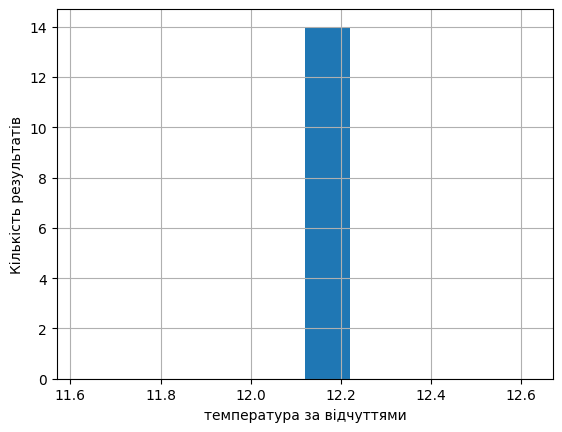

In [251]:
vykid_group = df_weather.query('temp <= 30 & temp >= 20 & atemp >= 10 & atemp <= 20')
vykid_group.head()

vykid_group['atemp'].hist();
plt.xlabel('температура за відчуттями')
plt.ylabel('Кількість результатів')
# я бачу, що колонка з atemp має однакові значення у виведених єлементів, при різній вологості та температурі. Перевіряю:
vykid_group.atemp.unique()
# видало один результат 12.12.

**Це може свідчити про** можливу технічну помилку або неправильний запис у даних
. Також я відкидаю варіант, що температура була записана у іншій шкалі.

**2. Я хочу дослідити вплив дня тижня, місяця, року чи сезону на кількість орендованих велосипедів.**

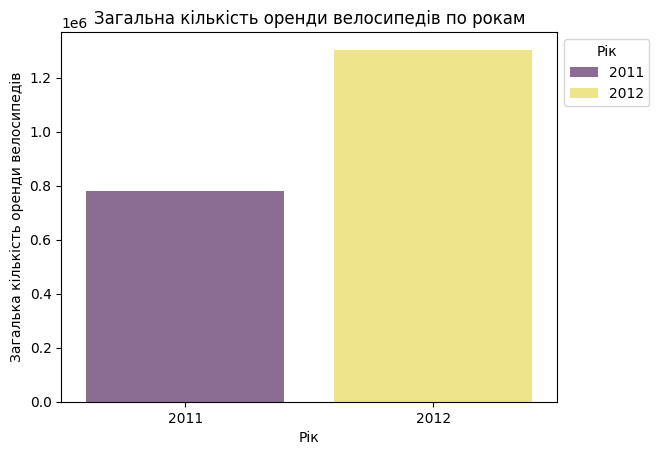

In [241]:
df.datetime = pd.to_datetime(df['datetime'])
df['year'] = df.datetime.dt.year
df['month'] = df.datetime.dt.month
df['day'] = df.datetime.dt.day
df['day_of_week'] = df['datetime'].dt.dayofweek


df_year=df.groupby(['year'])['count'].sum().reset_index()
sns.barplot(x='year', y='count', data=df_year, hue='year', palette='viridis', alpha=.6)
plt.xlabel('Рік')
plt.ylabel('Загалька кількість оренди велосипедів')
plt.title('Загальна кількість оренди велосипедів по рокам')
plt.legend(title='Рік', loc='upper left', bbox_to_anchor=(1, 1));

З діаграми я бачу основну тенденцію росту оренди велосипедів щороку.

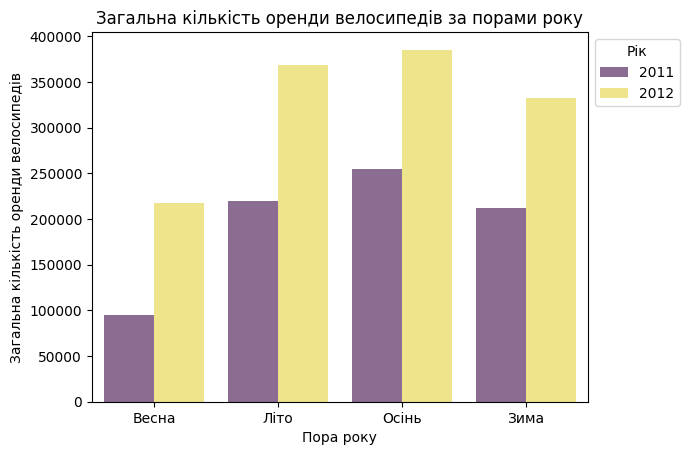

In [242]:
df_season = df.groupby(['season','year'])['count'].sum().reset_index()
df_season['season'] = df_season['season'].map({
    1: 'Весна', 2: 'Літо', 3: 'Осінь', 4: 'Зима'
})
sns.barplot(x='season', y='count', data=df_season, hue = 'year', palette='viridis', alpha=.6)
plt.xlabel('Пора року')
plt.ylabel('Загальна кількість оренди велосипедів')
plt.title('Загальна кількість оренди велосипедів за порами року')
plt.legend(title='Рік', loc='upper left', bbox_to_anchor=(1, 1));

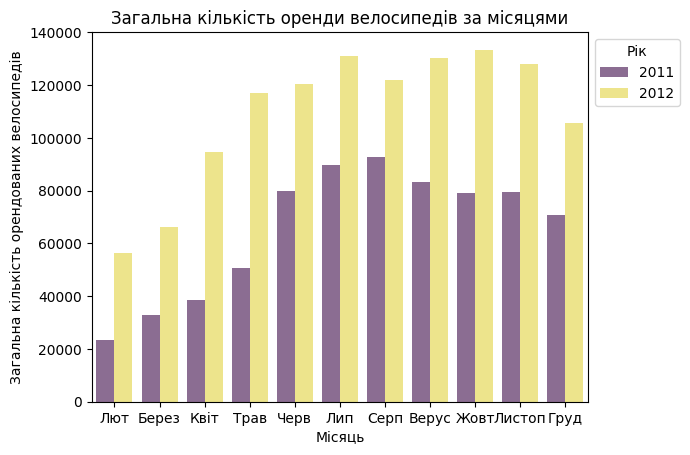

In [243]:
df_month=df.groupby(['month', 'year'])['count'].sum().reset_index()
df_month['month'] = df_month['month'].map({
    0: 'Січ', 1: 'Лют', 2: 'Берез', 3: 'Квіт', 4: 'Трав', 5: 'Черв', 6: 'Лип', 7: 'Серп', 8: 'Верус', 9: 'Жовт', 10: 'Листоп', 11: 'Груд'
})
sns.barplot(x='month', y='count', data=df_month, hue='year', palette='viridis', alpha=.6)
plt.xlabel('Місяць')
plt.ylabel('Загальна кількість орендованих велосипедів')
plt.title('Загальна кількість оренди велосипедів за місяцями')
plt.legend(title='Рік', loc='upper left', bbox_to_anchor=(1, 1));

Бачимо, що найбільша активність клієнтів спостерігається з травня до листопада. Найнижча активність у січні та лютому, тож нам треба подумати, як залучати клієнтів користуватися цими послугами у ці місяці. треба також зрозуміти, які фактори впливають на такі результати(погода, канікули та святкові дні, тощо).

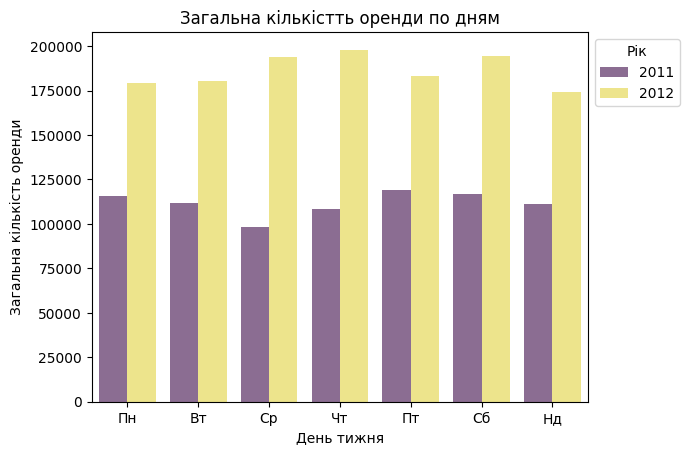

In [244]:
df_day_of_week = df.groupby(['day_of_week', 'year'])['count'].sum().reset_index()
df_day_of_week['day_of_week'] = df_day_of_week['day_of_week'].map({
    0: 'Пн', 1: 'Вт', 2: 'Ср', 3: 'Чт', 4: 'Пт', 5: 'Сб', 6: 'Нд'
})
sns.barplot(x='day_of_week', y='count', data=df_day_of_week, hue='year', palette='viridis', alpha=.6)
plt.xlabel('День тижня')
plt.ylabel('Загальна кількість оренди')
plt.title('Загальна кількістть оренди по дням')
plt.legend(title='Рік', loc='upper left', bbox_to_anchor=(1, 1));

Бачимо, що найменша активність користувачів, що у 2011, що у 2012 роках припадає на неділю. Тож нам треба подумати, як заохочувати клієнтів користуватися велосипедами навіть у вихідний(наприклад, сімейні акції по неділях зі знижками для сімей. Бо однією з причин низького використання є бажання людей провести вихідні з рідними і залишитись вдома).

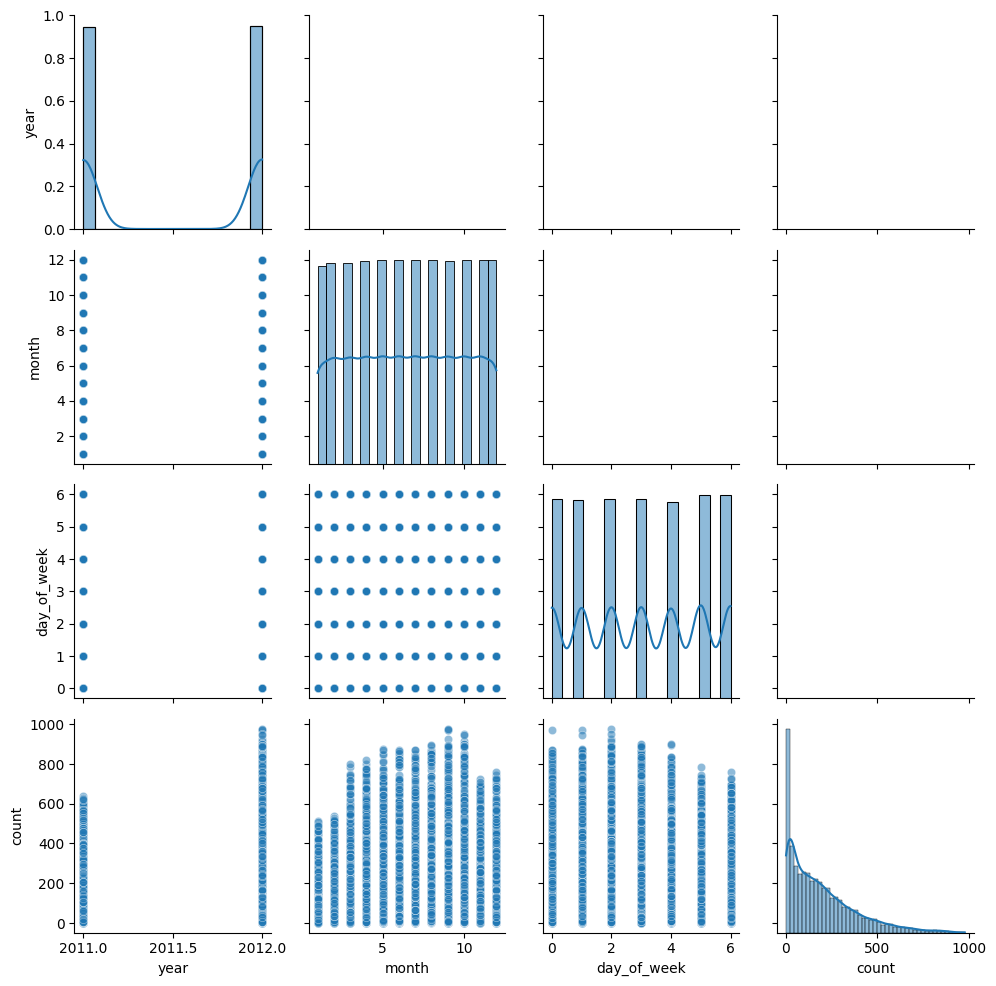

In [245]:
g = sns.PairGrid(df[['year', 'month', 'day_of_week', 'count']], diag_sharey=False)
g.map_lower(sns.scatterplot, alpha=0.5)
g.map_diag(sns.histplot, kde=True);

**Загалом**, як ми бачемо, то спостерігаються основна тенденція зростання. Аренда велосипедів просідає у холодні пори року і місяці. Розподіл оренди велосипедів має праве зміщення: більшість днів мають меншу кількість оренд, а дуже велика кількість оренд — рідкісне явище. Серед днів тижня просідає активність у неділю, можливо це повязано з тим, що люди хочуть провести цей день вдома з рідними, або просто відпочити. Тож нам треба подумати, як вмотивувати клієнтів користуватися велосипедами. Можливе проведення акцій для сімей, які хочуть активно провести вихідні, і за це можуть отримати знижку.

**3. Я хочу дослідити активність користувачів у святкові дні**

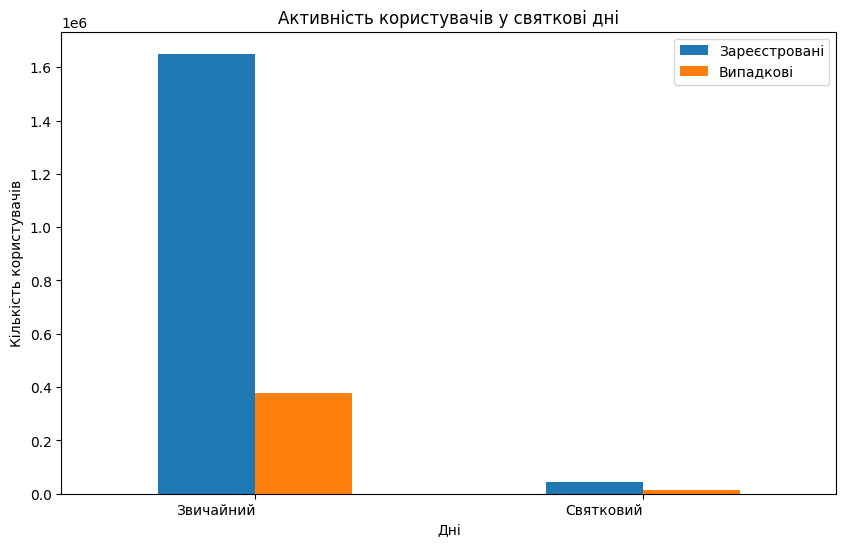

In [234]:
df_holiday_act = df.groupby('holiday')[['registered', 'casual']].sum()
df_holiday_act.index = df_holiday_act.index.map({0: 'Звичайний', 1: 'Святковий'})
ax = df_holiday_act.plot(kind='bar', figsize=(10, 6))
ax.set_xticklabels(ax.get_xticklabels(), rotation=360, ha="right")
plt.title('Активність користувачів у святкові дні')
plt.xlabel('Дні')
plt.ylabel('Кількість користувачів')
plt.legend(['Зареєстровані', 'Випадкові']);

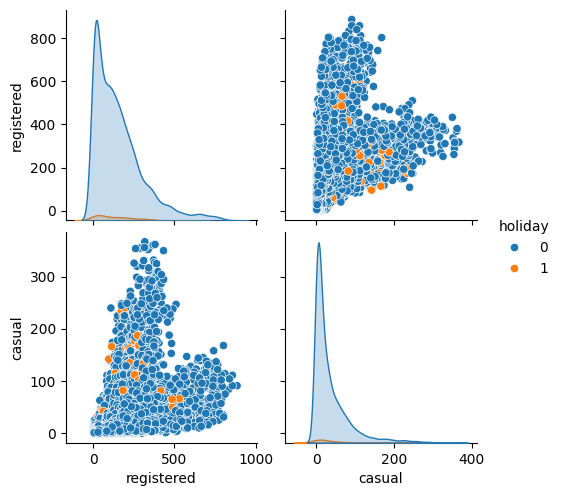

In [235]:
sns.pairplot(data=df[['registered', 'casual', 'holiday']], hue="holiday");

Бачу, що активність усіх користувачів низька у святкові дні. Тож нам треба подумати як підняти активність користувачів у святкові дні.